Homework 3.1
Number of elements larger than 8: 18.0
about 25 or 2.5% is expected for one half of the 95% confidence interval of 50.


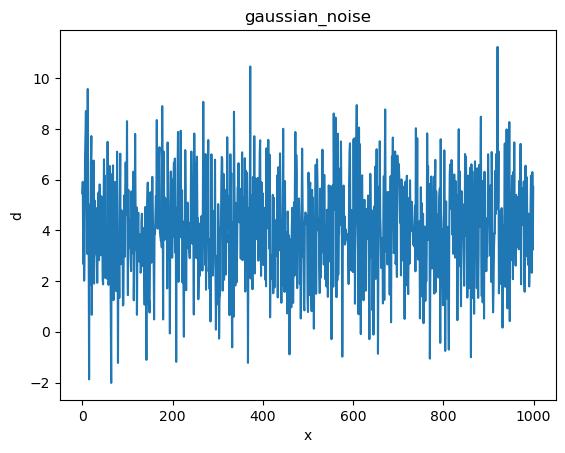

In [1]:
# Homework 3.1: 1.	Create a script that uses the np.random.normal() method to create a column vector d of N=1000 realizations 
# of a normally-distributed random variable with mean d_bar=4 and standard deviation sigma=2. Plot the data and count the number 
# of instances where d>2 sigma_d. Is this about the number you expected?
import numpy as np
import matplotlib.pyplot as plt
N = 1000
x_bar=4
sigma=2
x = np.random.normal(x_bar, sigma, N)

threshold = x_bar + 2 * sigma
y = np.zeros_like(x)
y[x > threshold] = 1

print(f"Homework 3.1")
print(f"Number of elements larger than {threshold}: {np.sum(y)}")
print('about 25 or 2.5% is expected for one half of the 95% confidence interval of 50.')

plt.plot(x)
plt.xlabel('x')
plt.ylabel('d')
plt.title('gaussian_noise')
plt.show()

Homework 3.2a
m_estimated no noise: [ 1.   -1.    0.4  -0.03]
m_estimated with Gaussian noise with sigma=2: [ 0.52 -0.69  0.33 -0.03]
Note: The entire homework is simplified by using the generalized inverse np.linalg.pinv(G)!!!


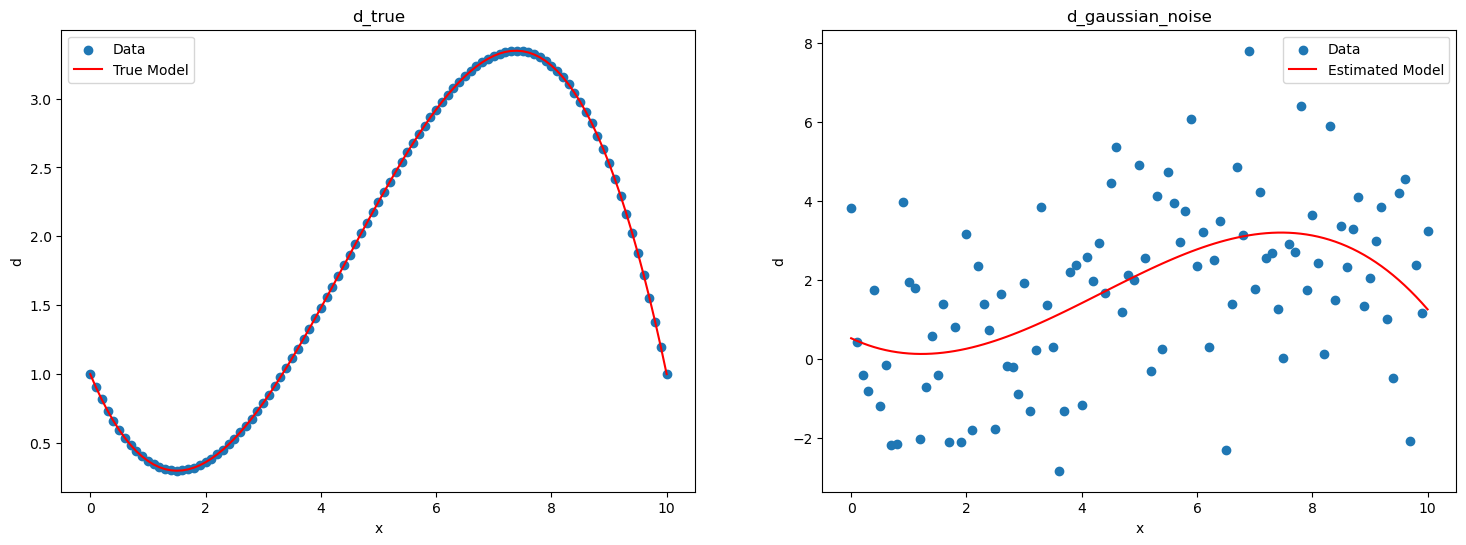

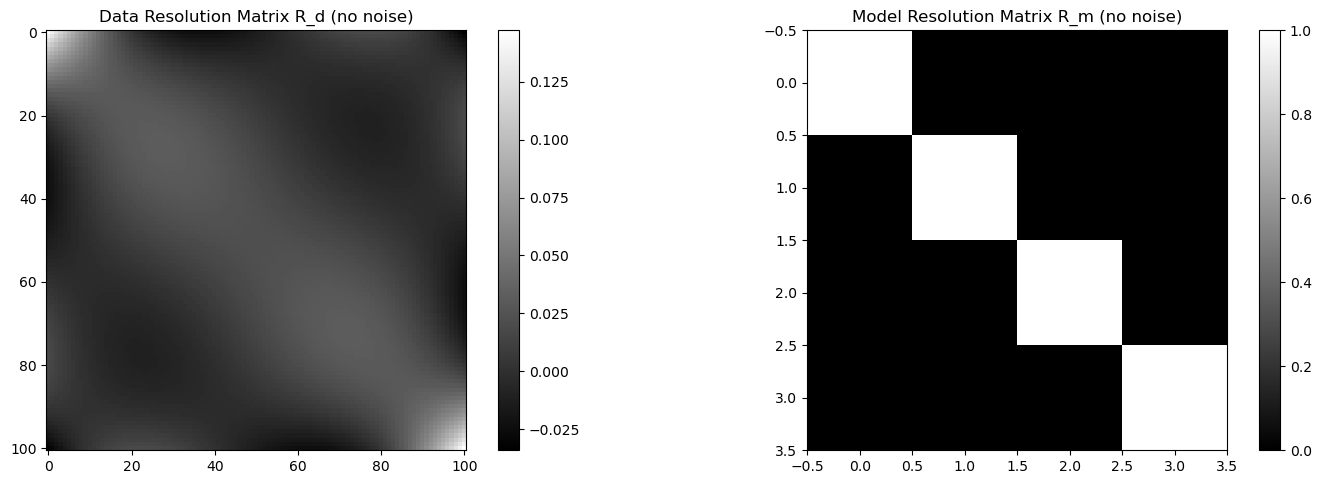

In [ ]:
# 3.2.	Assume model parameters mtrue.  Based on these model prameters generate synthetic data dtrue, invert the data to obtain a model estimation, mest. 
# Does the estimated model (the solution) agree with the original model parameters? Add noise of variable color and strength to the data 
# and discuss how much mest differs from mtrue. Plot the synthetic data without and with noise and the predicted data for the estimated model. 
#
# The model we consider is a third order polynomial (cubic equation) given by y=m1+xm2+x2m3+x3m4. We use m_true=[1, -1, 0.4, -0.03].   
#
# 3.2a)	Create Gaussian noise with a standard deviation of sigma=2 (also try other standard deviations). Plot (i) the synthetic data,  
# (ii) the synthetic data with noise added including predicted data based on estimated model, (iii) the data resolution matrix, 
# (iv) the model resolution matrices. 

import os
import numpy as np
from matplotlib import pyplot as plt  # general plotting 

# Set model parameters
m_true = [1, -1, 0.4, -0.03]

N = 101
x = np.linspace(0, 10, N)

m = m_true.copy()

# Create the matrix G and synthetic data
G = np.vstack([np.ones(N), x, x**2, x**3]).T
d_true = G @ m

# Create a vector containing Gaussian noise
sigma = 2
gaussian_noise = np.random.normal(0, sigma, len(d_true))

# Create noisy synthetic data  
d_gaussian_noise = d_true  + gaussian_noise

# Calculate the estimated models
m_est = np.linalg.inv(G.T @ G) @ G.T @ d_true
m_est_gaussian_noise = np.linalg.inv(G.T @ G) @ G.T @ d_gaussian_noise

print(f"Homework 3.2a")
print("m_estimated no noise:", m_est)
print(f"m_estimated with Gaussian noise with sigma={sigma}:", np.round(m_est_gaussian_noise, 2))

# Calculate the data and model resolution matriced R_d and R_m
R_d = G @ np.linalg.inv(G.T @ G) @ G.T
R_m = np.linalg.inv(G.T @ G) @ G.T @ G

# Plot the results
plt.figure(figsize=(18, 6))

# Plot d_true
plt.subplot(1, 2, 1)
plt.scatter(x, d_true, label='Data')
plt.plot(x, G @ m_est, 'r-', label='True Model')
plt.xlabel('x')
plt.ylabel('d')
plt.title('d_true')
plt.legend()

# Plot d_gaussian_noise
plt.subplot(1, 2, 2)
plt.scatter(x, d_gaussian_noise, label='Data')
plt.plot(x, G @ m_est_gaussian_noise, 'r-', label='Estimated Model')
plt.xlabel('x')
plt.ylabel('d')
plt.title('d_gaussian_noise')
plt.legend()

# Plot the data and model resolution matrizes  R_d R_m
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.imshow(R_d, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.title('Data Resolution Matrix R_d (no noise)')

# Plot model resolution matrix R_m
plt.subplot(2, 2, 2)
plt.imshow(R_m, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.title('Model Resolution Matrix R_m (no noise)')

print(f"Note: The entire homework is simplified by using the generalized inverse np.linalg.pinv(G)!!!")

Homework 3.2b
Noise with sigma= 2
m_linear: [0.60630772 0.23519797]
m_second: [ 0.35871632  0.38525336 -0.01500554]
m_third: [ 2.25535307 -1.94896654  0.57146222 -0.03909785]


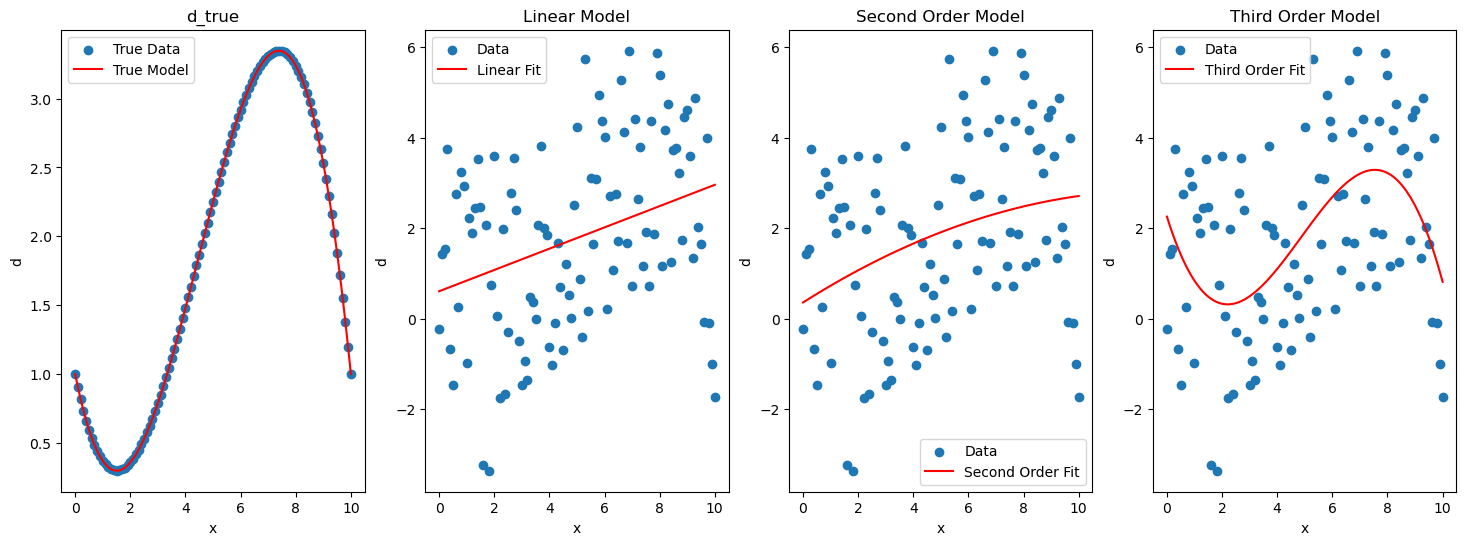

In [ ]:
# 3.2b)	Also invert the synthetic data using linear and quadratic models. Use sigma=2 but also try other standard deviations. 
#  Which is your preferred model? Pretend you don’t know that the data were created using a cubic model. 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Create design matrices for the models
G_linear = np.vstack([np.ones(N), x]).T
G_second = np.vstack([np.ones(N), x, x**2]).T
G_third = np.vstack([np.ones(N), x, x**2, x**3]).T

# Create data with Gaussian noise
sigma = 2  # or 5, as desired
gaussian_noise = np.random.normal(0, sigma, len(d_true))
d = d_true + gaussian_noise

# Estimate model parameters using least squares
m_linear = np.linalg.inv(G_linear.T @ G_linear) @ G_linear.T @ d
m_second = np.linalg.inv(G_second.T @ G_second) @ G_second.T @ d
m_third = np.linalg.inv(G_third.T @ G_third) @ G_third.T @ d

print(f"Homework 3.2b")
print("Noise with sigma=", sigma)
print("m_linear:", m_linear)
print("m_second:", m_second)
print("m_third:", m_third)

# Plot the results for visual inspection
plt.figure(figsize=(18, 6))

# Plot true data with true model if available
plt.subplot(1, 4, 1)
plt.scatter(x, d_true, label='True Data')
# Plot true model if G and m_est are defined
if 'G' in globals() and 'm_est' in globals():
    plt.plot(x, G @ m_est, 'r-', label='True Model')
plt.xlabel('x')
plt.ylabel('d')
plt.title('d_true')
plt.legend()

# Plot linear model fit
plt.subplot(1, 4, 2)
plt.scatter(x, d, label='Data')
plt.plot(x, G_linear @ m_linear, 'r-', label='Linear Fit')
plt.xlabel('x')
plt.ylabel('d')
plt.title('Linear Model')
plt.legend()

# Plot second order polynomial fit
plt.subplot(1, 4, 3)
plt.scatter(x, d, label='Data')
plt.plot(x, G_second @ m_second, 'r-', label='Second Order Fit')
plt.xlabel('x')
plt.ylabel('d')
plt.title('Second Order Model')
plt.legend()

# Plot third order polynomial fit
plt.subplot(1, 4, 4)
plt.scatter(x, d, label='Data')
plt.plot(x, G_third @ m_third, 'r-', label='Third Order Fit')
plt.xlabel('x')
plt.ylabel('d')
plt.title('Third Order Model')
plt.legend()

plt.show()


Homework 3.2c
m_estimated no noise: [ 1.   -1.    0.4  -0.03]
m_estimated with Gaussian noise with sigma=0: [ 1.   -1.    0.4  -0.03]


Text(0.5, 1.0, 'Model Resolution Matrix R_m (no noise)')

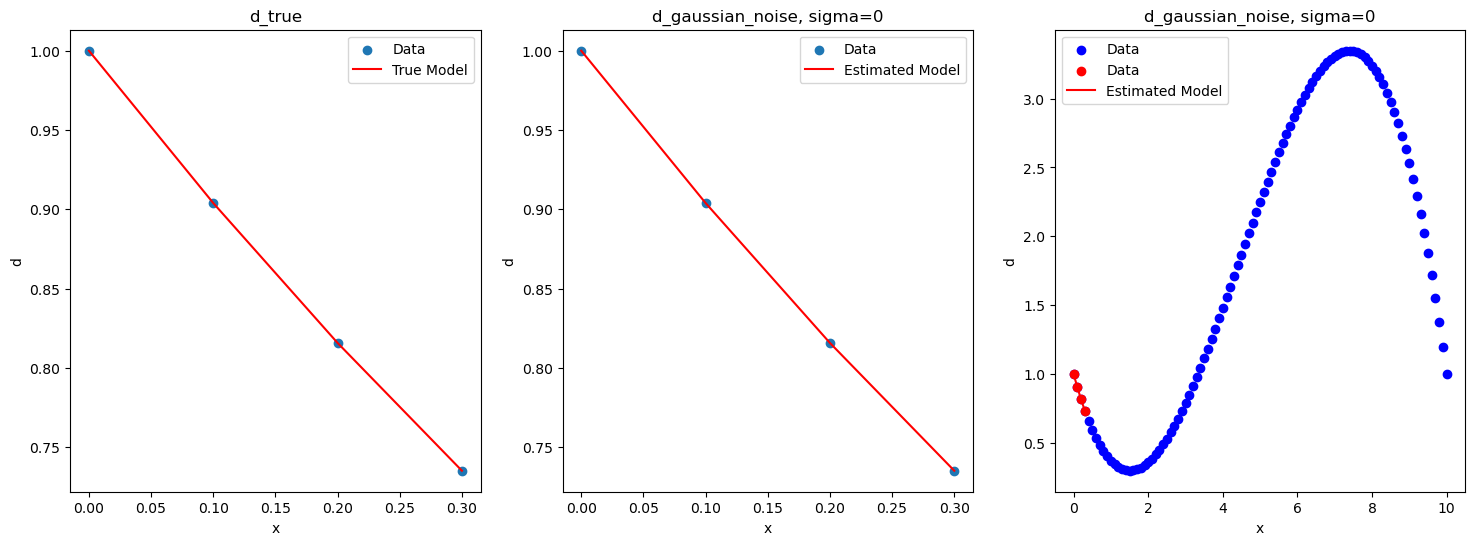

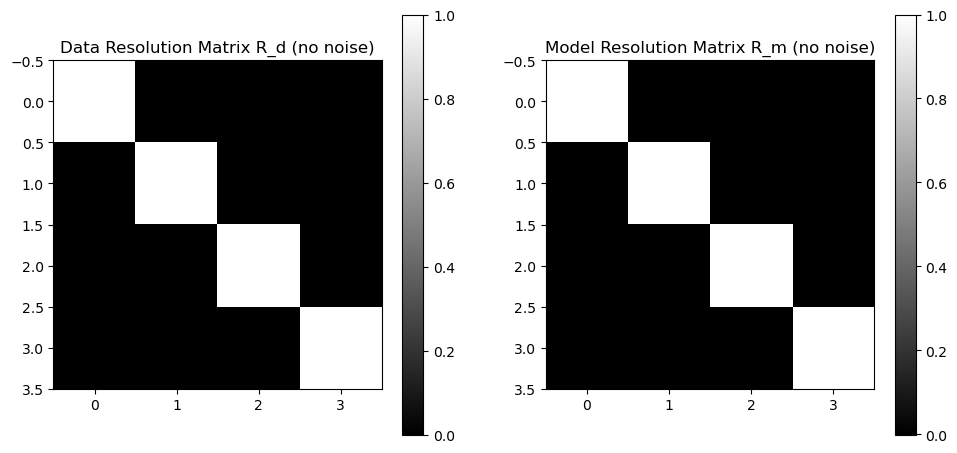

In [ ]:
# 3.2c 

import os
import numpy as np
from matplotlib import pyplot as plt  # general plotting 

# Set model parameters
m_true = [1, -1, 0.4, -0.03]

N = 101
x = np.linspace(0, 10, N)

N = 4
x = x[0:4] 
m = m_true.copy()

# Create the matrix G and synthetic data
G = np.vstack([np.ones(N), x, x**2, x**3]).T
d_true = G @ m

# Create a vector containing Gaussian noise
sigma = 0
gaussian_noise = np.random.normal(0, sigma, len(d_true))

# Create noisy synthetic data  
d_gaussian_noise = d_true  + gaussian_noise

# Calculate the estimated models
m_est = np.linalg.inv(G.T @ G) @ G.T @ d_true
m_est_gaussian_noise = np.linalg.inv(G.T @ G) @ G.T @ d_gaussian_noise

print(f"Homework 3.2c")
print("m_estimated no noise:", m_est)
print(f"m_estimated with Gaussian noise with sigma={sigma}:", np.round(m_est_gaussian_noise, 2))

# Calculate the data and model resolution matriced R_d and R_m
R_d = G @ np.linalg.inv(G.T @ G) @ G.T
R_m = np.linalg.inv(G.T @ G) @ G.T @ G

# Plot the results
plt.figure(figsize=(18, 6))

# Plot d_true
plt.subplot(1, 3, 1)
plt.scatter(x, d_true, label='Data')
plt.plot(x, G @ m_est, 'r-', label='True Model')
plt.xlabel('x')
plt.ylabel('d')
plt.title('d_true')
plt.legend()

# Plot d_gaussian_noise
plt.subplot(1, 3, 2)
plt.scatter(x, d_gaussian_noise, label='Data')
plt.plot(x, G @ m_est_gaussian_noise, 'r-', label='Estimated Model')
plt.xlabel('x')
plt.ylabel('d')
plt.title(f'd_gaussian_noise, sigma={sigma}')
plt.legend()

# Plot d_gaussian_noise
plt.subplot(1, 3, 3)
N = 101
x1 = np.linspace(0, 10, N)
G1 = np.vstack([np.ones(N), x1, x1**2, x1**3]).T
d_pred1 = G1 @ m_est
plt.scatter(x1, d_pred1, color='blue', label='Data')
plt.scatter(x, d_gaussian_noise, color='red', label='Data')
plt.plot(x, G @ m_est_gaussian_noise, 'r-', label='Estimated Model')
plt.xlabel('x')
plt.ylabel('d')
plt.title(f'd_gaussian_noise, sigma={sigma}')
plt.legend()

# Plot the data and model resolution matrizes  R_d R_m
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
plt.imshow(R_d, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.title('Data Resolution Matrix R_d (no noise)')
# Plot model resolution matrix R_m
plt.subplot(2, 3, 2)
plt.imshow(R_m, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.title('Model Resolution Matrix R_m (no noise)')

Homework 3.2d
Noise with sigma= 2
m_true: [  1.    -1.   -10.    10.     0.4   -0.03]
m_est_bad: [-2.38679711e+13 -1.10732489e+14  9.71143217e+13  4.10000000e-02
 -2.54000000e-01 -1.00000000e-03]
m_est: [ 1.215 -0.377 -0.377 -0.377  0.446 -0.034]


Text(0.5, 1.0, 'Model Resolution Matrix R_m')

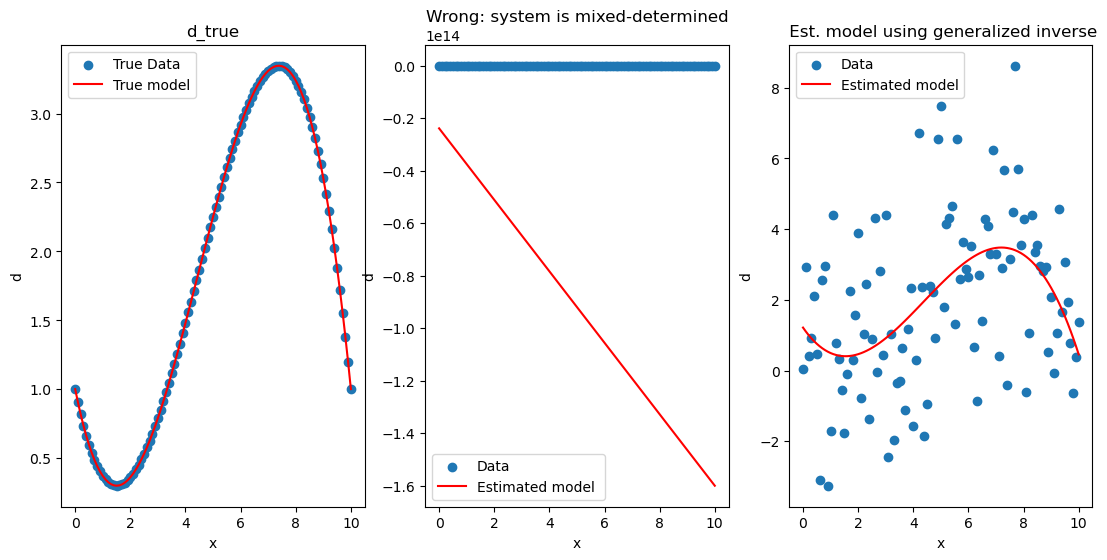

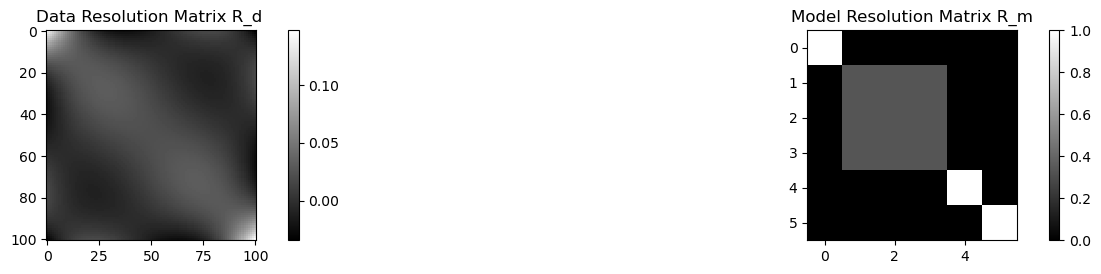

In [ ]:
# 3.2d)	d.)	Now consider a model with 6 model parameters y=m1+xm2+xm3+xm4+x2m5+x3m6. Create the design matrix and 
# estimate the model parameters.  What type of inverse problem is this?

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Set model parameters
m_true = [1, -1, -0.4, -0.03]

N = 101
x = np.linspace(0, 10, N)

m = m_true.copy()

# Create the design matrix G and synthetic data
G = np.vstack([np.ones(N), x, x, x, x**2, x**3]).T
d_true = G @ m

# # Create a vector containing Gaussian noise and noisy synthetic data 
sigma = 2
gaussian_noise = np.random.normal(0, sigma, len(d_true))

d = d_true.copy()
d = d_true + gaussian_noise
# Estimate model parameters using least squares
m_est_bad = np.linalg.inv(G.T @ G) @ G.T @ d
m_est = np.linalg.pinv( G ) @ d

# Calculate the data and model resolution matriced R_d and R_m
R_d = G @ np.linalg.inv(G.T @ G) @ G.T
R_m = np.linalg.inv(G.T @ G) @ G.T @ G

G_pinv = np.linalg.pinv(G)
R_d = G @ G_pinv
R_m = G_pinv @ G

print(f"Homework 3.2d")
print("Noise with sigma=", sigma)
print("m_true:", np.round(m_true,3))
print("m_est_bad:", np.round(m_est_bad,3))
print("m_est:", np.round(m_est,3))

# Plot the results for visual inspection
plt.figure(figsize=(18, 6))

# Plot true data with true model if available
plt.subplot(1, 4, 1)
plt.scatter(x, d_true, label='True Data')
plt.plot(x, G @ m_true, 'r-', label='True model')
plt.xlabel('x')
plt.ylabel('d')
plt.title('d_true')
plt.legend()

# Plot  model fit
plt.subplot(1, 4, 2)
plt.scatter(x, d, label='Data')
plt.plot(x, G @ m_est_bad, 'r-', label='Estimated model ')
plt.xlabel('x')
plt.ylabel('d')
plt.title('Wrong: system is mixed-determined')
plt.legend()

# Plot  model fit
plt.subplot(1, 4, 3 )
plt.scatter(x, d, label='Data')
plt.plot(x, G @ m_est, 'r-', label='Estimated model')
plt.xlabel('x')
plt.ylabel('d')
plt.title(' Est. model using generalized inverse')
plt.legend()

plt.figure(figsize=(18, 6))
plt.subplot(2, 2, 1)
plt.imshow(R_d, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.title('Data Resolution Matrix R_d ')
plt.subplot(2, 2, 2)
plt.imshow(R_m, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.title('Model Resolution Matrix R_m')

Homework 3.2e
m_estimated no noise: [ 1.   -1.    0.4  -0.03]
m_estimated with const offset [ 0.92 -0.77  0.31 -0.02]
m_estimated double exponential noise [ 1.18 -1.48  0.54 -0.04]
m_estimated lognormal noise [ 2.07 -1.05  0.42 -0.03]
m_estimated powerlaw noise [ 0.97 -1.6   0.58 -0.04]


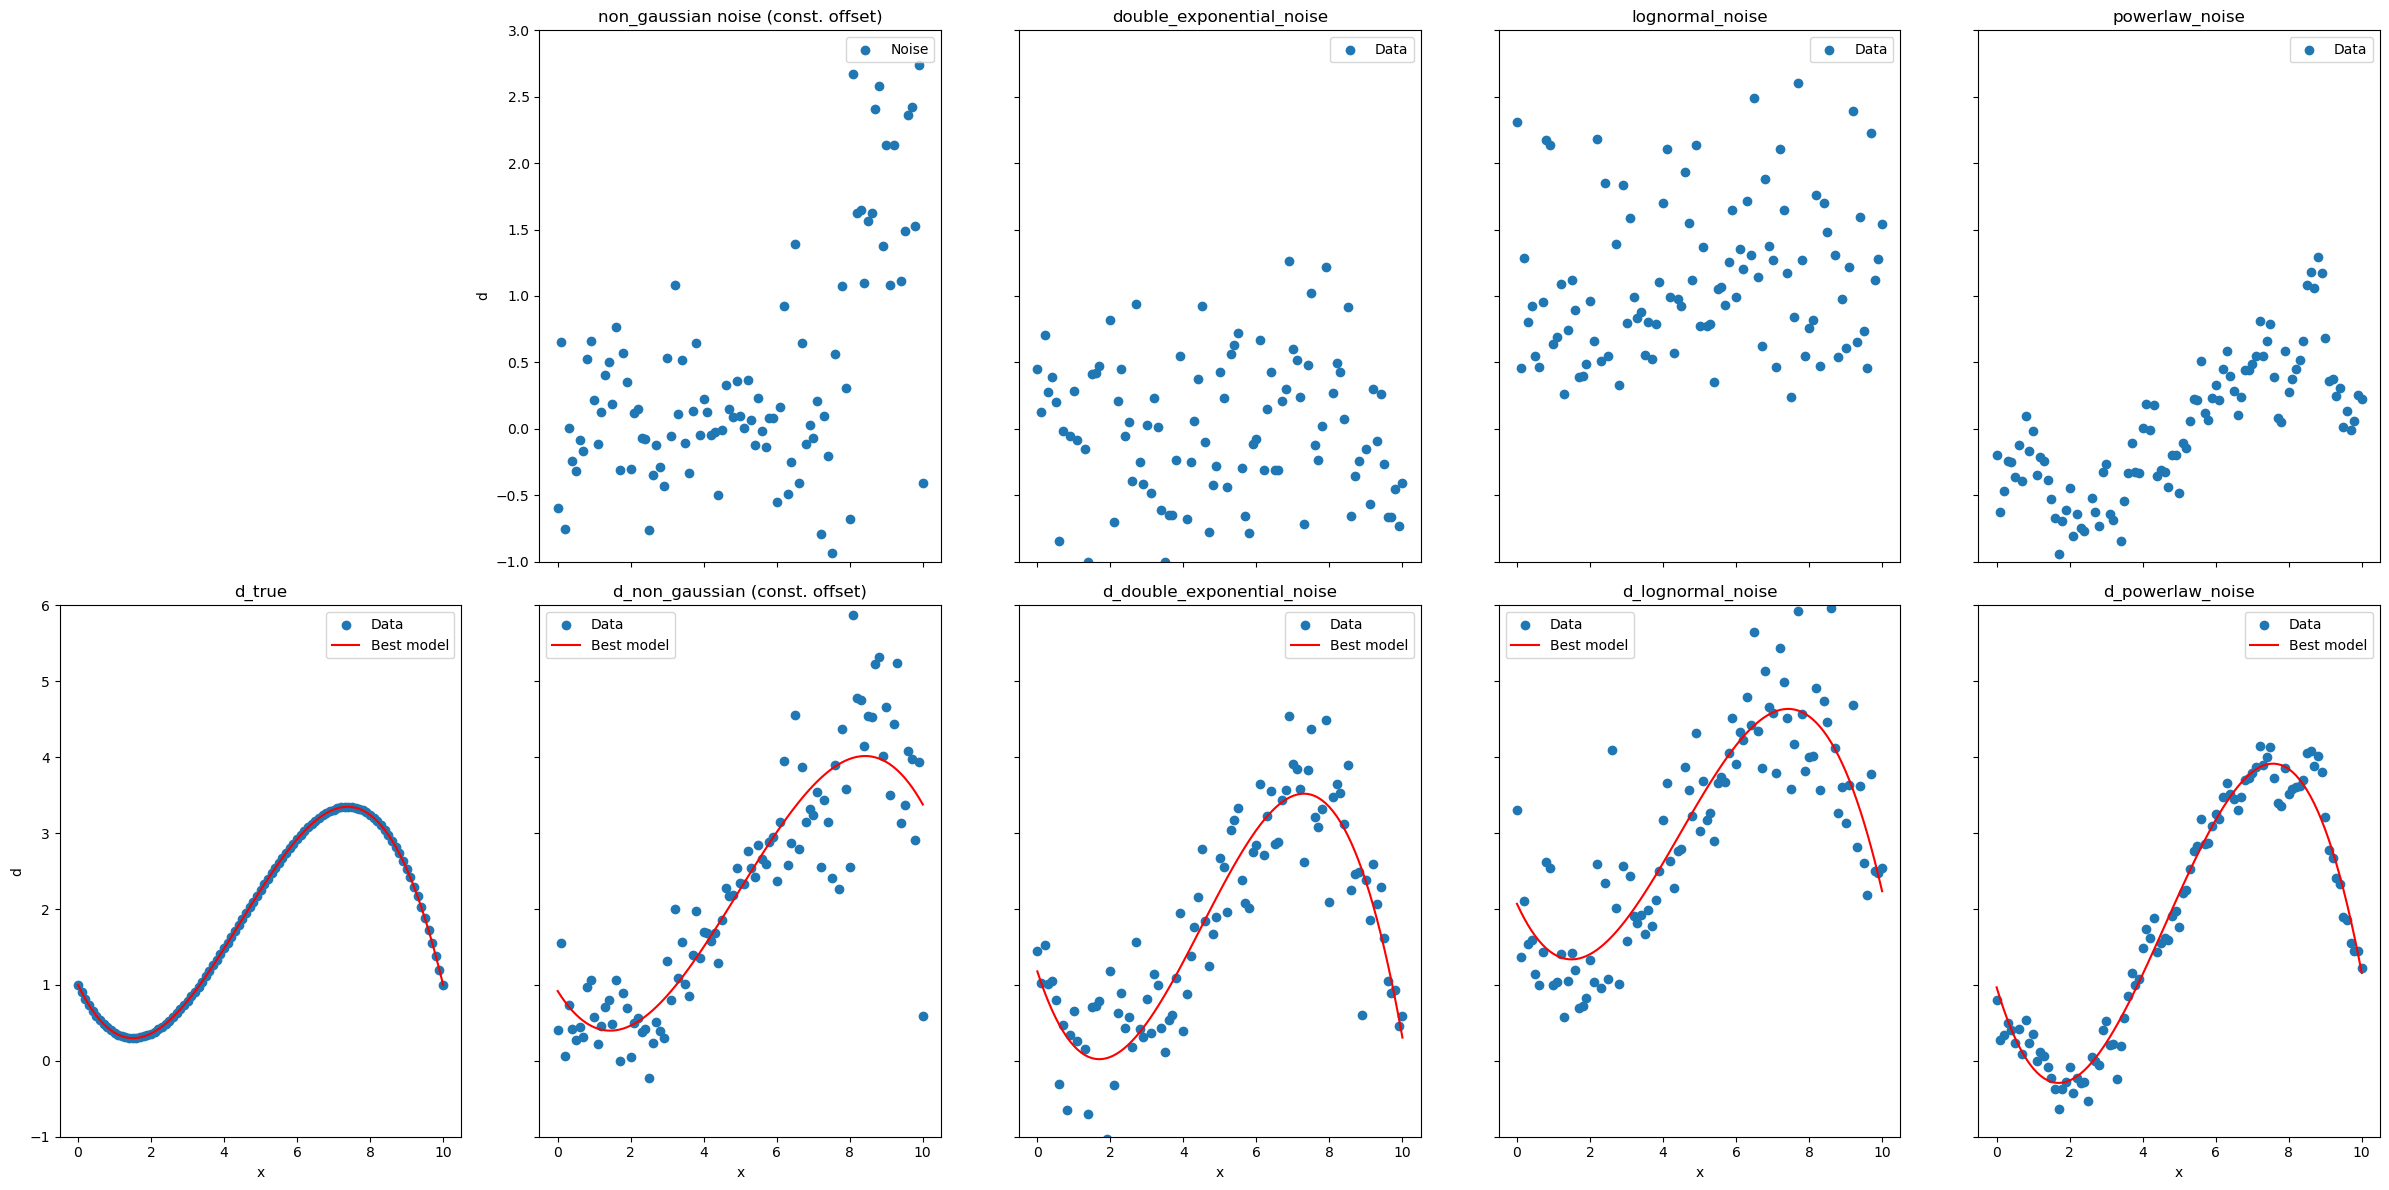

 What is the pitfall? In the inversion we assume Gaussian noise which does not apply here. The solution is therefore not a maximum-likelihood solution. 


In [ ]:
# 3.2e)	Same as a) but consider non-Gaussian noise. It can be obtained by adding a constant offset to the data, and by sampling from a 
# double exponential, lognormal distribution and powerlaw distribution. Estimate the model parameters using the cubic model. 
# What is the pitfall of this approach?
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


# Set model parameters
m_true = [1, -1, 0.4, -0.03]
m = m_true

# Create the design matrix G and synthetic data
N = 101
x = np.linspace(0, 10, N)
G= np.vstack([np.ones(N), x, x**2, x**3]).T
d_true = G @ m

# # Create a vector containing Gaussian noise and noisy synthetic data 
sigma = 2
gaussian_noise = np.random.normal(0, sigma, len(d_true))

# Assume non-Gaussian noise
sigma = 0.5
gaussian_noise = np.random.normal(0, sigma, len(d_true))

# Create a vector with power-law noise
def generate_power_law_noise(size, exponent):
    f = np.fft.fftfreq(size)
    f[0] = 1  # avoid division by zero
    spectrum = np.abs(f) ** (-exponent / 2.0)
    phases = np.exp(2j * np.pi * np.random.rand(size))
    noise = np.fft.ifft(spectrum * phases).real
    return noise

# Create 5 noisy synthetic data: Gaussian (as before), same with constant offset,  double exponential, lognormal,  power-law noisse

double_exponential_noise = np.random.laplace(loc=0, scale=0.5, size=len(d_true))
lognormal_noise = np.random.lognormal(mean=0, sigma=0.5, size=len(d_true))
powerlaw_noise = generate_power_law_noise(len(x), 1.5)

d_gaussian_noise = d_true + gaussian_noise

constant_offset = 2
d_non_gaussian = d_gaussian_noise.copy()
d_non_gaussian[(x > 8) & (x < 10)] += constant_offset

d_double_exponential_noise = d_true + double_exponential_noise
d_lognormal_noise = d_true + lognormal_noise
d_powerlaw_noise = d_true + powerlaw_noise

# Calculate the estimated models
m_est = np.linalg.inv(G.T @ G) @ G.T @ d_true
m_est_gaussian_noise = np.linalg.inv(G.T @ G) @ G.T @ d_gaussian_noise
m_est_non_gaussian = np.linalg.inv(G.T @ G) @ G.T @ d_non_gaussian
m_est_double_exponential = np.linalg.inv(G.T @ G) @ G.T @ d_double_exponential_noise
m_est_lognormal = np.linalg.inv(G.T @ G) @ G.T @ d_lognormal_noise
m_est_powerlaw = np.linalg.inv(G.T @ G) @ G.T @ d_powerlaw_noise

print(f"Homework 3.2e")
print("m_estimated no noise:", m_est)
print("m_estimated with const offset", np.round(m_est_non_gaussian, 2))
print("m_estimated double exponential noise", np.round(m_est_double_exponential, 2))
print("m_estimated lognormal noise", np.round(m_est_lognormal, 2))
print("m_estimated powerlaw noise", np.round(m_est_powerlaw, 2))


# Adjust the figure size and spacing
plt.figure(figsize=(18, 10))
plt.subplots_adjust(wspace=0.2)

# Leave the first plot empty
plt.subplot(2, 5, 1)
plt.axis('off')

# Plot noise
ax1 = plt.subplot(2, 5, 2)
plt.scatter(x, d_non_gaussian - d_true, label='Noise')
plt.ylabel('d')
plt.title('non_gaussian noise (const. offset)')
plt.legend()
plt.ylim(-1, 3)

# Plot double exponential noise
ax2 = plt.subplot(2, 5, 3)
plt.scatter(x, d_double_exponential_noise - d_true, label='Data')
plt.title('double_exponential_noise')
plt.legend()
plt.ylim(-1, 3)

# Plot lognormal noise
ax3 = plt.subplot(2, 5, 4)
plt.scatter(x, d_lognormal_noise - d_true, label='Data')
plt.title('lognormal_noise')
plt.legend()
plt.ylim(-1, 3)

# Plot powerlaw noise
ax4 = plt.subplot(2, 5, 5)
plt.scatter(x, d_powerlaw_noise - d_true, label='Data')
plt.title('powerlaw_noise')
plt.legend()
plt.ylim(-1, 3)

# Plot d_true
ax5 = plt.subplot(2, 5, 6)
plt.scatter(x, d_true, label='Data')
plt.plot(x, G @ m_est, 'r-', label='Best model')
plt.xlabel('x')
plt.ylabel('d')
plt.title('d_true')
plt.legend()
plt.ylim(-1, 6)

# Plot d_non_gaussian
ax6 = plt.subplot(2, 5, 7)
plt.scatter(x, d_non_gaussian, label='Data')
plt.plot(x, G @ m_est_non_gaussian, 'r-', label='Best model')
plt.xlabel('x')
plt.title('d_non_gaussian (const. offset)')
plt.legend()
plt.ylim(-1, 6)

# Plot d_double_exponential_noise
ax7 = plt.subplot(2, 5, 8)
plt.scatter(x, d_double_exponential_noise, label='Data')
plt.plot(x, G @ m_est_double_exponential, 'r-', label='Best model')
plt.xlabel('x')
plt.title('d_double_exponential_noise')
plt.legend()
plt.ylim(-1, 6)

# Plot d_lognormal_noise
ax8 = plt.subplot(2, 5, 9)
plt.scatter(x, d_lognormal_noise, label='Data')
plt.plot(x, G @ m_est_lognormal, 'r-', label='Best model')
plt.xlabel('x')
plt.title('d_lognormal_noise')
plt.legend()
plt.ylim(-1, 6)

# Plot d_powerlaw_noise
ax9 = plt.subplot(2, 5, 10)
plt.scatter(x, d_powerlaw_noise, label='Data')
plt.plot(x, G @ m_est_powerlaw, 'r-', label='Best model')
plt.xlabel('x')
plt.title('d_powerlaw_noise')
plt.legend()
plt.ylim(-1, 6)

# Hide y-axis labels for all but the left-most plots
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax8.get_yticklabels(), visible=False)
plt.setp(ax9.get_yticklabels(), visible=False)

# Hide x-axis labels for the upper row
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

plt.tight_layout()
plt.show()

print(" What is the pitfall? In the inversion we assume Gaussian noise which does not apply here. The solution is therefore not a maximum-likelihood solution. ")

Homework 3.2f
Noise with sigma= 0.1
m_linear: [0.37038382 0.28820063]
m_second: [-0.50209031  0.81697283 -0.05287722]
m_third: [ 0.95099523 -0.9713618   0.39643804 -0.02995435]
F-statistic (linear vs. second order): 45.57193073983606
p-value (linear vs. second order): 1.0451598475569313e-09
F-statistic (second vs. third order): 4262.55047442993
p-value (second vs. third order): 1.1102230246251565e-16
Homework 3.2f
Noise with sigma= 0.5
m_linear: [0.43153543 0.283443  ]
m_second: [-0.44592763  0.81523879 -0.05317958]
m_third: [ 1.04239641 -1.0164644   0.40703194 -0.03068077]
F-statistic (linear vs. second order): 25.206093907447976
p-value (linear vs. second order): 2.308684023621943e-06
F-statistic (second vs. third order): 123.91326982133533
p-value (second vs. third order): 1.1102230246251565e-16
Homework 3.2f
Noise with sigma= 0.8
m_linear: [0.40475482 0.27165379]
m_second: [-0.19776787  0.63681906 -0.03651653]
m_third: [ 1.08532724 -0.94230574  0.36023521 -0.02645012]
F-statistic (

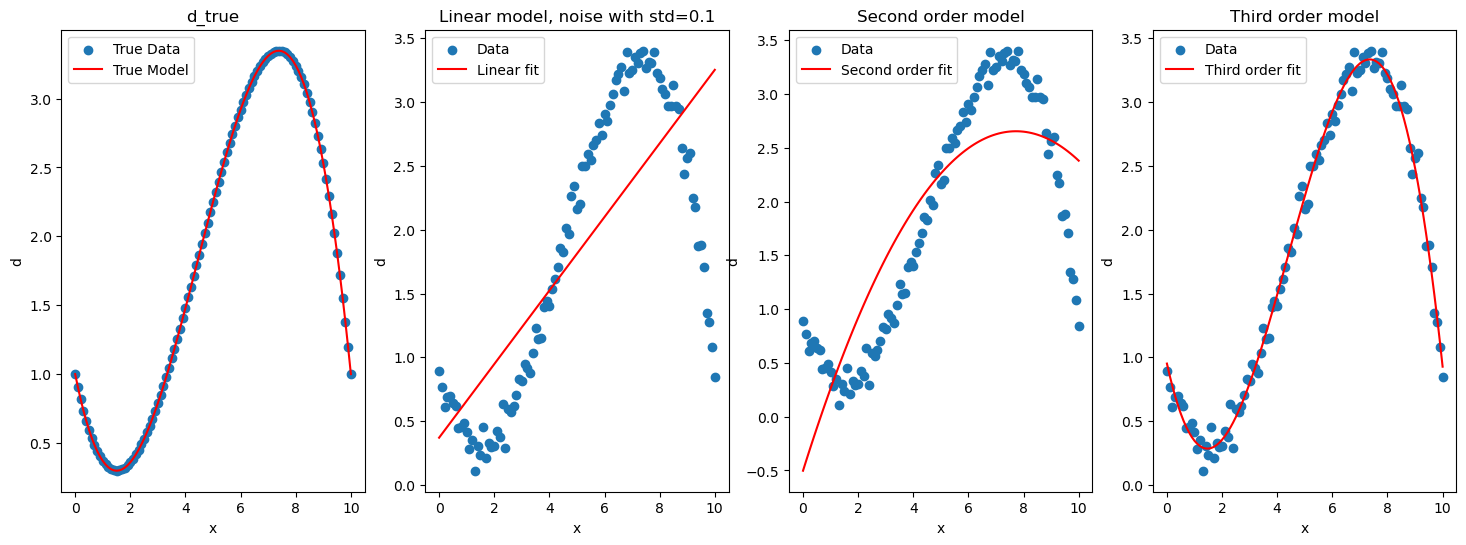

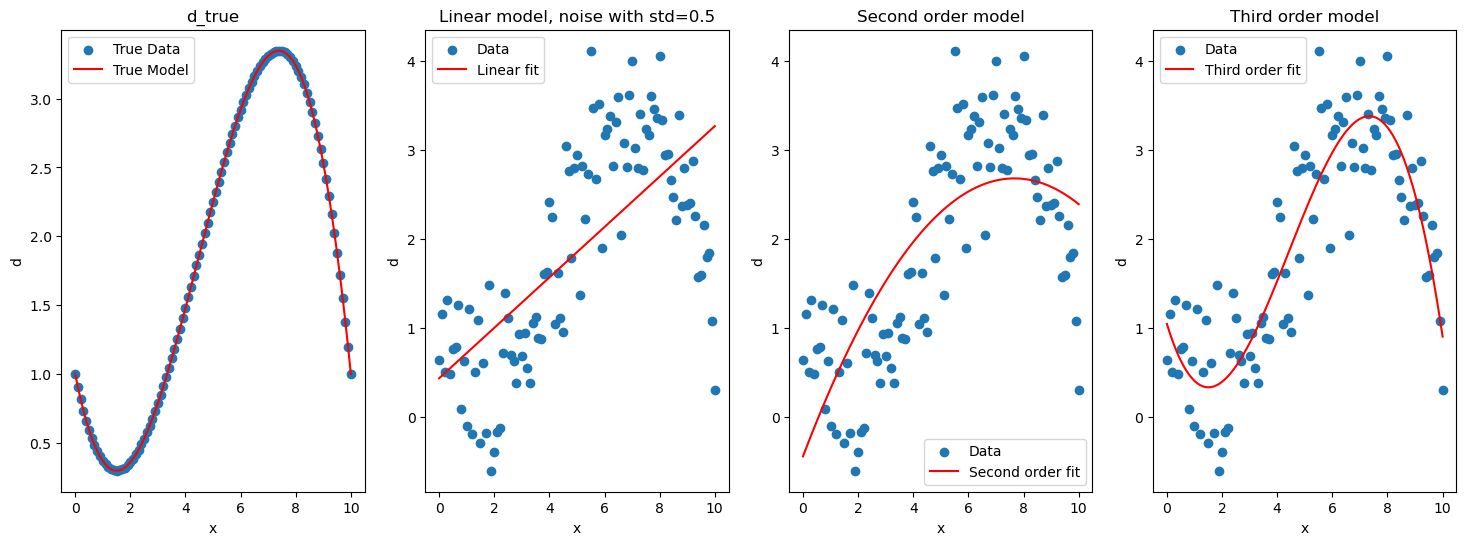

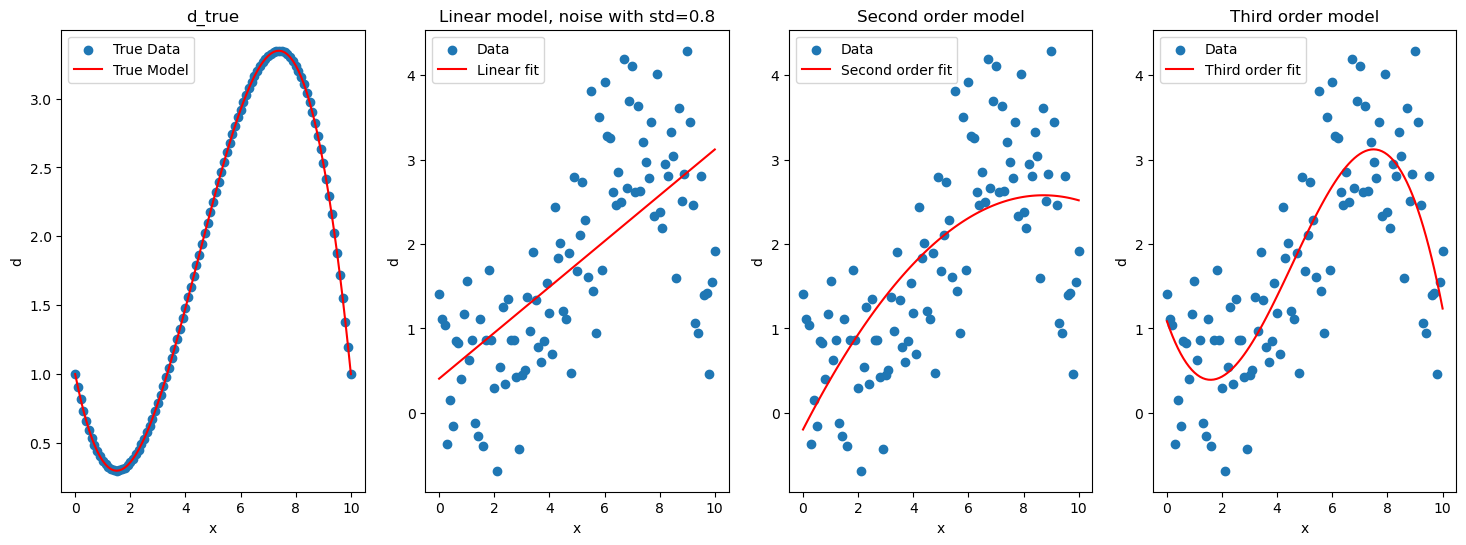

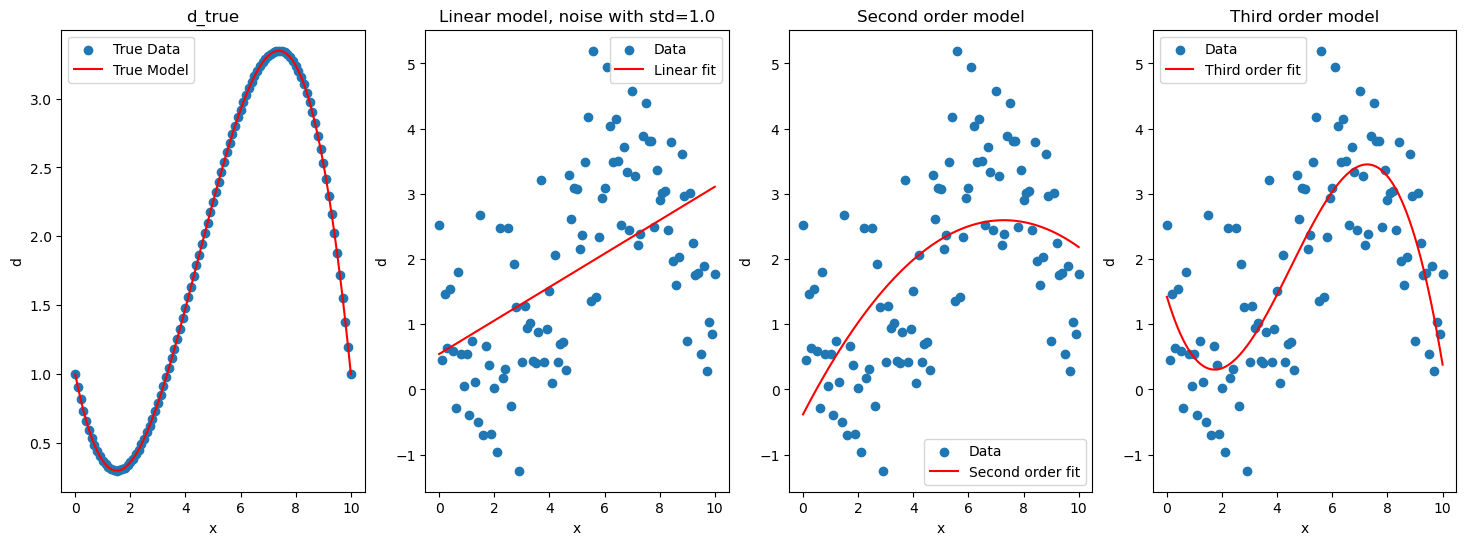

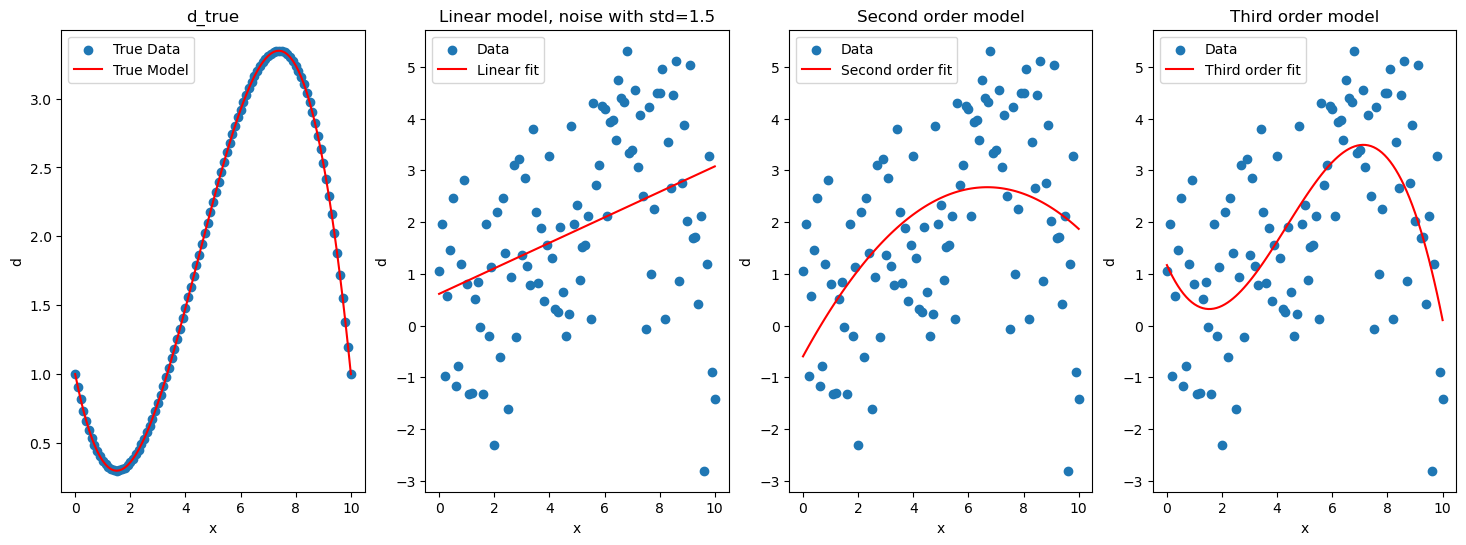

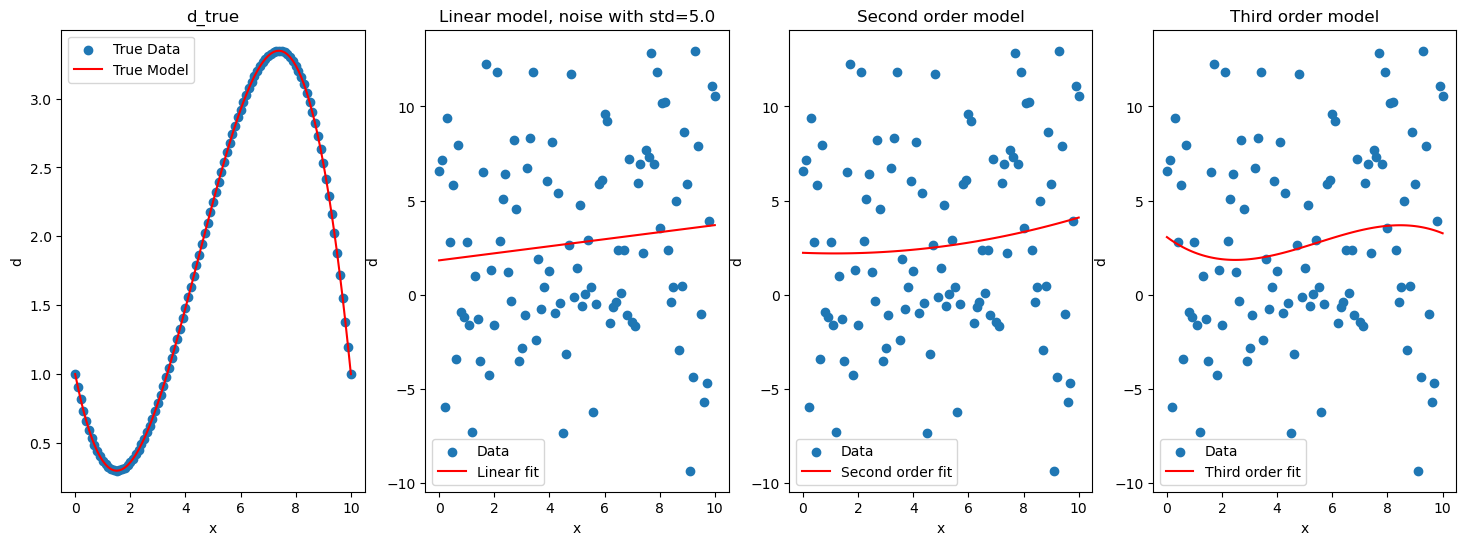

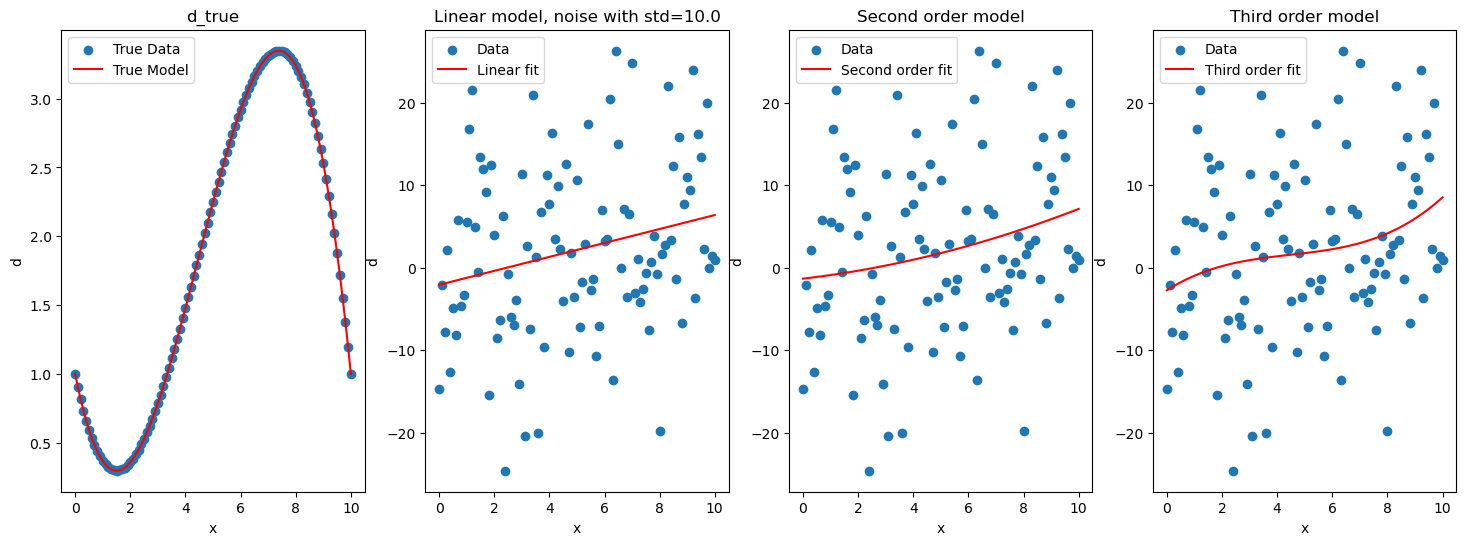

In [15]:
# 3.2f	(voluntarily; required for InSAR students).  Use the F-test to determine whether the data can be explained 
# using a linear model or require the more complex quadratic and cubic models which have more model parameters) 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Set model parameters
m_true = [1, -1, 0.4, -0.03]
N = 101
x = np.linspace(0, 10, N)
m = m_true

# Create the matrix G and synthetic data
G = np.vstack([np.ones(N), x, x**2, x**3]).T
d_true = G @ m

# Create design matrices for the models
G_linear = np.vstack([np.ones(N), x]).T
G_second = np.vstack([np.ones(N), x, x**2]).T
G_third = np.vstack([np.ones(N), x, x**2, x**3]).T

# Create data with Gaussian noise
sigma_list = [0.1, 0.5, 0.8, 1.0, 1.5, 5.0, 10.0]
for sigma in sigma_list:    
    gaussian_noise = np.random.normal(0, sigma, len(d_true))
    d = d_true + gaussian_noise

    # Estimate model parameters using least squares
    m_linear = np.linalg.inv(G_linear.T @ G_linear) @ G_linear.T @ d
    m_second = np.linalg.inv(G_second.T @ G_second) @ G_second.T @ d
    m_third = np.linalg.inv(G_third.T @ G_third) @ G_third.T @ d

    print(f"Homework 3.2f")
    print("Noise with sigma=", sigma)
    print("m_linear:", m_linear)
    print("m_second:", m_second)
    print("m_third:", m_third)

    # Calculate residuals for each model
    residuals_linear = d - G_linear @ m_linear
    residuals_second = d - G_second @ m_second
    residuals_third = d - G_third @ m_third

    # Calculate Residual Sum of Squares (RSS) for each model
    RSS_linear = np.sum(residuals_linear**2)
    RSS_second = np.sum(residuals_second**2)
    RSS_third = np.sum(residuals_third**2)

    # --- F-test: Linear vs. Second Order Model ---
    # Linear model: 2 parameters, Second order: 3 parameters
    p_linear = 2
    p_second = 3
    df_linear = N - p_linear
    df_second = N - p_second

    # Extra parameter for second vs. linear:
    dof_num_linear_second = p_second - p_linear  # 1

    F_stat_linear_second = ((RSS_linear - RSS_second) / dof_num_linear_second) / (RSS_second / df_second)
    p_value_linear_second = 1 - f.cdf(F_stat_linear_second, dof_num_linear_second, df_second)

    print(f"F-statistic (linear vs. second order): {F_stat_linear_second}")
    print(f"p-value (linear vs. second order): {p_value_linear_second}")

    # --- F-test: Second vs. Third Order Model ---
    # Second order: 3 parameters, Third order: 4 parameters
    p_restricted = 3  # second order
    p_full = 4        # third order
    df_restricted = N - p_restricted
    df_full = N - p_full
    dof_num = p_full - p_restricted  # 1

    F_stat_second_third = ((RSS_second - RSS_third) / dof_num) / (RSS_third / df_full)
    p_value_second_third = 1 - f.cdf(F_stat_second_third, dof_num, df_full)

    print(f"F-statistic (second vs. third order): {F_stat_second_third}")
    print(f"p-value (second vs. third order): {p_value_second_third}")

    # Plot the results for visual inspection
    plt.figure(figsize=(18, 6))

    # Plot true data with true model if available
    plt.subplot(1, 4, 1)
    plt.scatter(x, d_true, label='True Data')
    # Plot true model if G and m_est are defined
    plt.plot(x, G @ m, 'r-', label='True Model')
    plt.xlabel('x')
    plt.ylabel('d')
    plt.title('d_true')
    plt.legend()

    # Plot linear model fit
    plt.subplot(1, 4, 2)
    plt.scatter(x, d, label='Data')
    plt.plot(x, G_linear @ m_linear, 'r-', label='Linear fit')
    plt.xlabel('x')
    plt.ylabel('d')
    plt.title(f'Linear model, noise with std={sigma}')
    plt.legend()

    # Plot second order polynomial fit
    plt.subplot(1, 4, 3)
    plt.scatter(x, d, label='Data')
    plt.plot(x, G_second @ m_second, 'r-', label='Second order fit')
    plt.xlabel('x')
    plt.ylabel('d')
    plt.title('Second order model')
    plt.legend()

    # Plot third order polynomial fit
    plt.subplot(1, 4, 4)
    plt.scatter(x, d, label='Data')
    plt.plot(x, G_third @ m_third, 'r-', label='Third order fit')
    plt.xlabel('x')
    plt.ylabel('d')
    plt.title('Third order model')
    plt.legend()

plt.show()


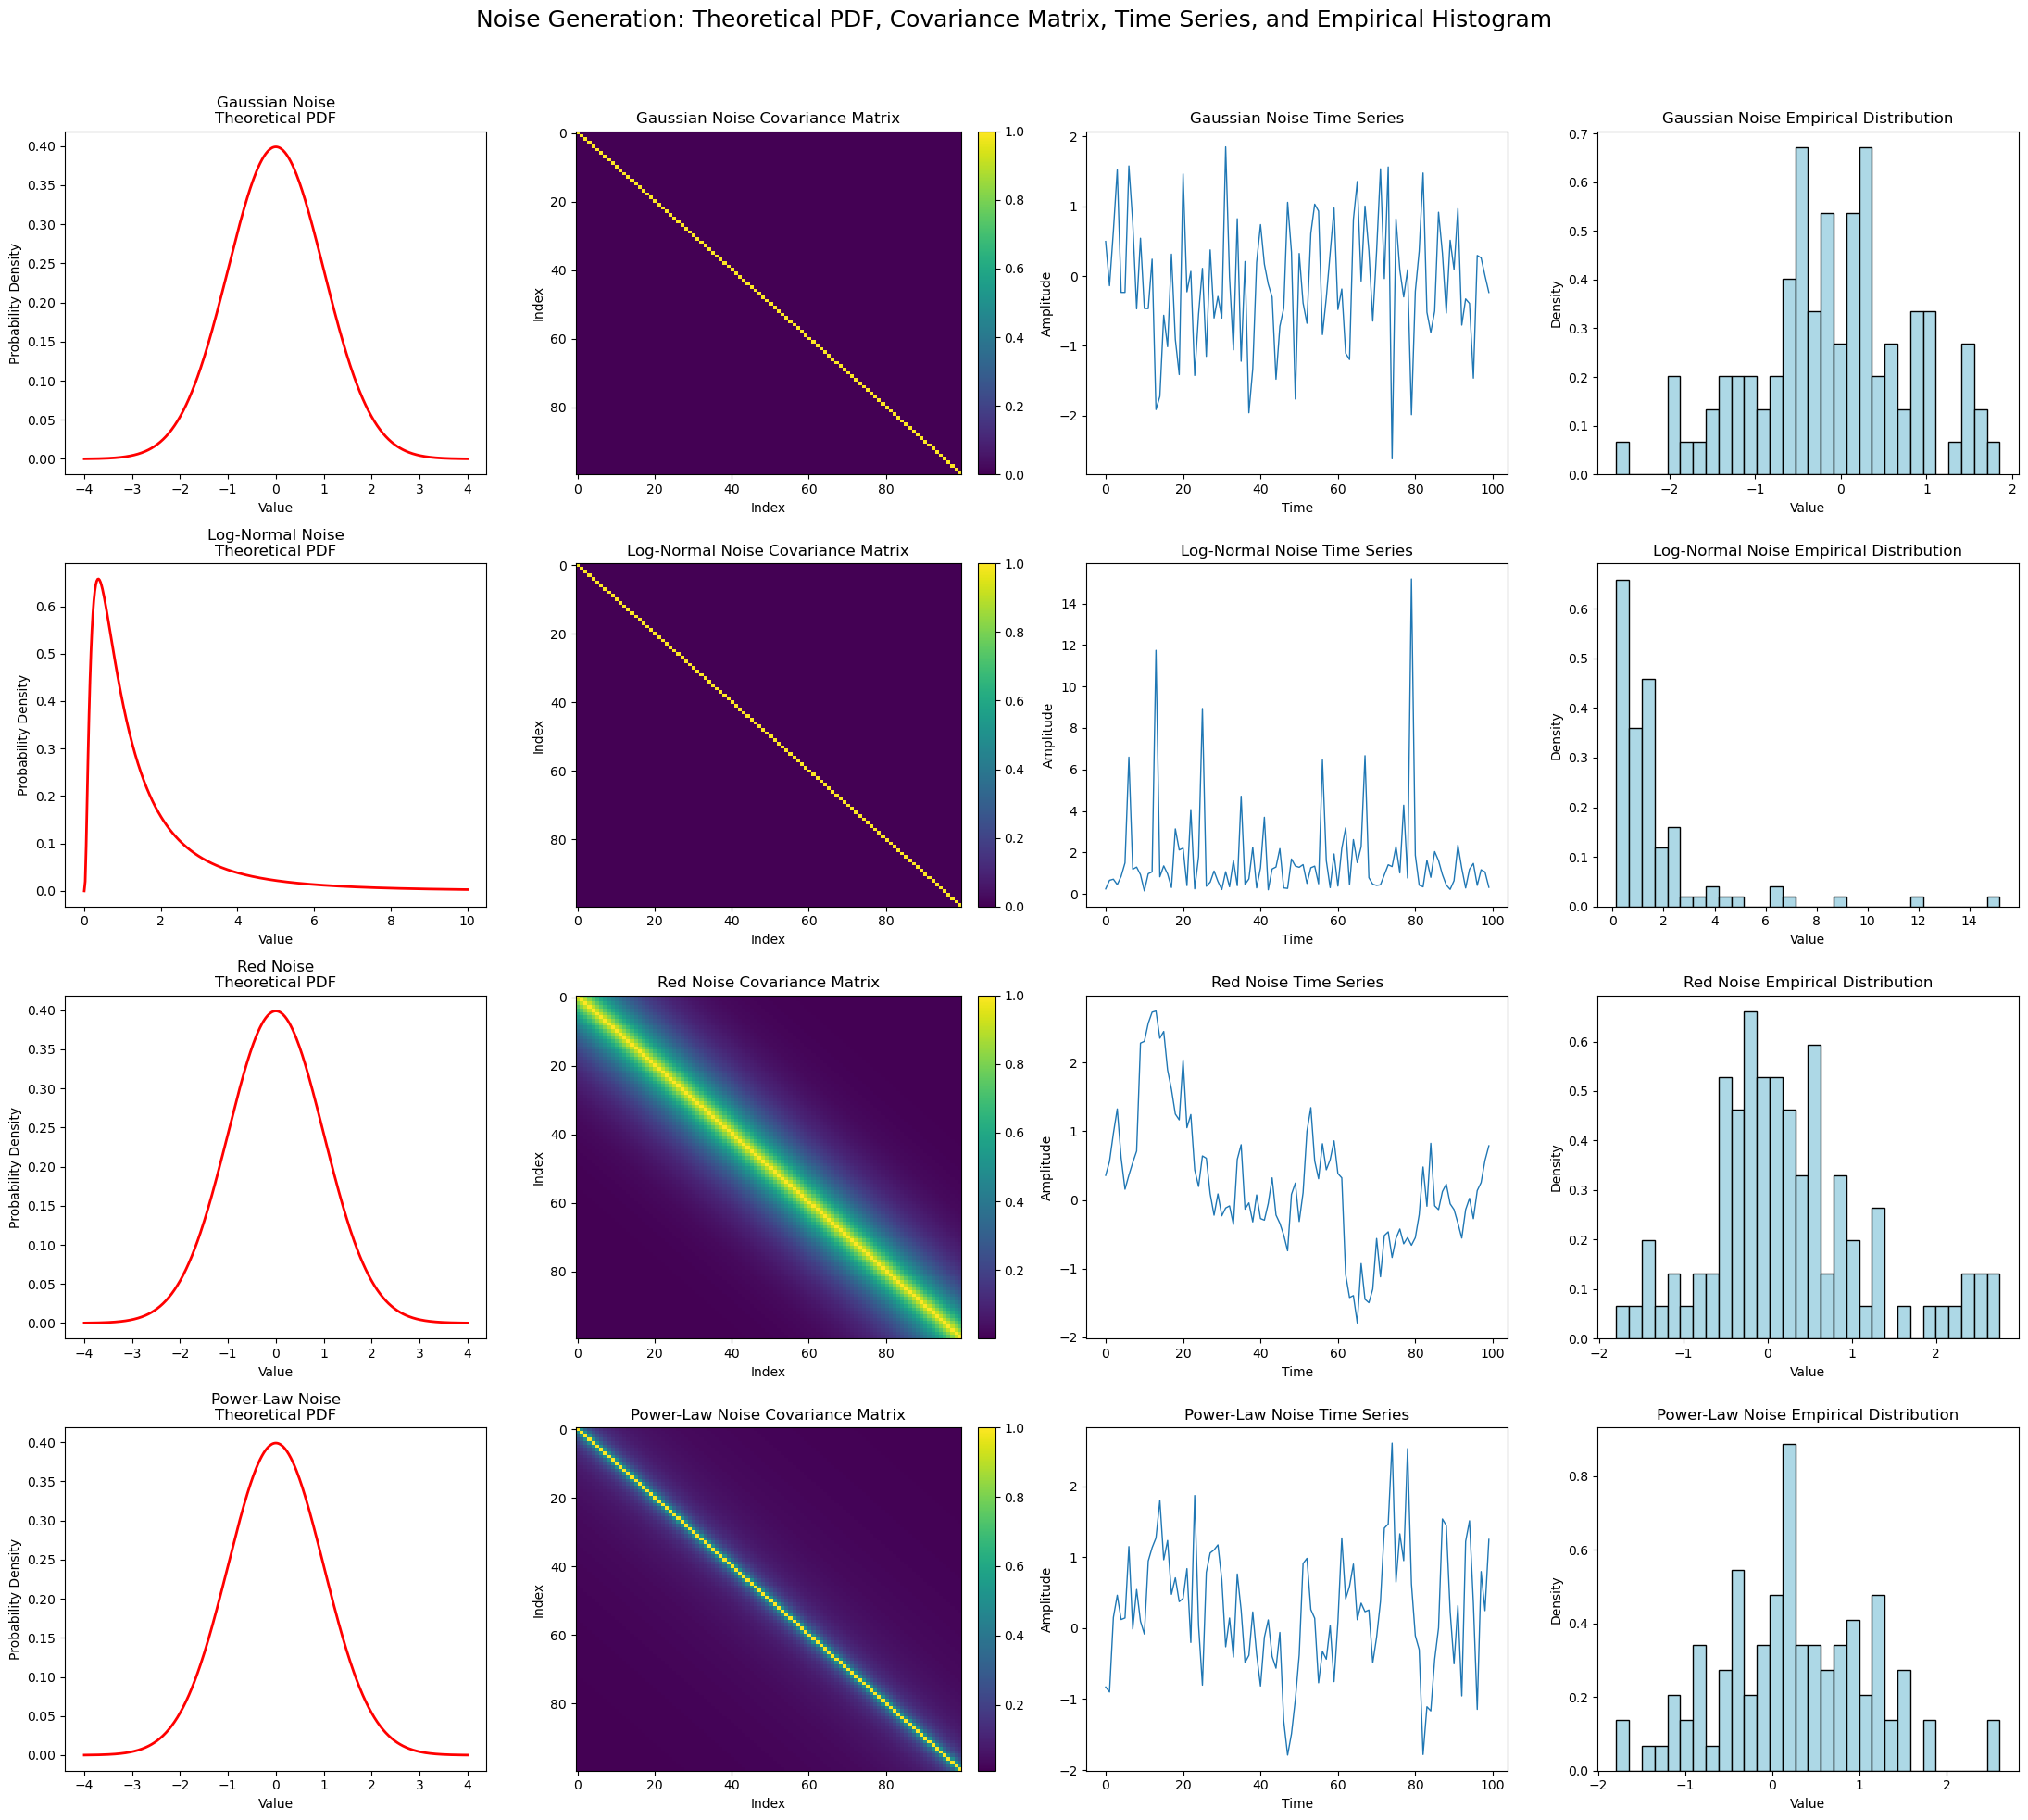

In [ ]:
# Homework 3.4: Make yourself familar with time series noise (uncorrelated and correlated)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Set random seed for reproducibility
np.random.seed(42)

# Adjustable number of samples for the noise vector
n_samples = 100  # Change this to 100, 1000, etc.
time = np.arange(n_samples)

# --------------------------
# Covariance Functions
# --------------------------
def covariance_identity(n):
    """Identity covariance (white noise)."""
    return np.eye(n)

def covariance_exponential(n, L):
    """Exponential covariance function (for red noise)."""
    idx = np.arange(n)
    diff = np.abs(idx[:, None] - idx[None, :])
    return np.exp(-diff / L)

def covariance_powerlaw(n, alpha):
    """Power-law covariance matrix: C(i,j) = 1/((|i-j|+1)^alpha)."""
    idx = np.arange(n)
    diff = np.abs(idx[:, None] - idx[None, :])
    return 1.0 / ((diff + 1) ** alpha)

# --------------------------
# Noise Types and Their Covariance Functions
# --------------------------
noise_types = ['Gaussian Noise', 'Log-Normal Noise', 'Red Noise', 'Power-Law Noise']
cov_funcs = [
    covariance_identity,                        # Gaussian Noise uses identity covariance
    covariance_identity,                        # Log-Normal Noise uses underlying Gaussian with identity
    lambda n: covariance_exponential(n, L=10),  # Red Noise with exponential covariance (L=10)
    lambda n: covariance_powerlaw(n, alpha=1)     # Power-Law Noise with alpha=1
]

# --------------------------
# Generate Noise Samples Using the Covariance Matrix
# --------------------------
noise_samples = []   # to store one noise realization for each type
cov_matrices = []    # to store the covariance matrix used

for label, cov_func in zip(noise_types, cov_funcs):
    cov_mat = cov_func(n_samples)
    cov_matrices.append(cov_mat)
    # Impose the covariance structure via a Cholesky decomposition:
    L_chol = np.linalg.cholesky(cov_mat)
    sample = L_chol @ np.random.randn(n_samples)
    # For Log-Normal Noise, exponentiate the underlying Gaussian sample.
    if label == 'Log-Normal Noise':
        sample = np.exp(sample)
    noise_samples.append(sample)

# --------------------------
# Define Theoretical PDFs for the Input Distribution
# --------------------------
# For Gaussian, Red, and Power-Law noise the underlying PDF is N(0,1).
# For Log-Normal noise, the underlying Gaussian is transformed to lognormal.
x_vals = {}
theoretical_pdf = {}

# For Gaussian, Red, and Power-Law Noise, use a symmetric range:
x_range = np.linspace(-4, 4, 400)
for key in ['Gaussian Noise', 'Red Noise', 'Power-Law Noise']:
    x_vals[key] = x_range
    theoretical_pdf[key] = norm.pdf(x_range, loc=0, scale=1)

# For Log-Normal Noise, use a range starting near 0:
x_vals['Log-Normal Noise'] = np.linspace(0.001, 10, 400)
theoretical_pdf['Log-Normal Noise'] = lognorm.pdf(x_vals['Log-Normal Noise'], s=1, scale=1)

# --------------------------
# Plotting: 4 Plots in a Row for Each Noise Type
# --------------------------
fig, axs = plt.subplots(len(noise_types), 4, figsize=(22, 5 * len(noise_types)))
fig.suptitle("Noise Generation: Theoretical PDF, Covariance Matrix, Time Series, and Empirical Histogram", fontsize=18)

for i, label in enumerate(noise_types):
    # Column 1: Plot Theoretical PDF (continuous line)
    axs[i, 0].plot(x_vals[label], theoretical_pdf[label], 'r-', lw=2)
    axs[i, 0].set_title(f"{label}\nTheoretical PDF")
    axs[i, 0].set_xlabel("Value")
    axs[i, 0].set_ylabel("Probability Density")
    
    # Column 2: Plot Covariance Matrix as a Heatmap
    im = axs[i, 1].imshow(cov_matrices[i], cmap='viridis', aspect='auto')
    axs[i, 1].set_title(f"{label} Covariance Matrix")
    axs[i, 1].set_xlabel("Index")
    axs[i, 1].set_ylabel("Index")
    fig.colorbar(im, ax=axs[i, 1], fraction=0.046, pad=0.04)
    
    # Column 3: Plot the Time Series Realization
    axs[i, 2].plot(time, noise_samples[i], lw=1)
    axs[i, 2].set_title(f"{label} Time Series")
    axs[i, 2].set_xlabel("Time")
    axs[i, 2].set_ylabel("Amplitude")
    
    # Column 4: Plot the Empirical Histogram of the Noise Values
    axs[i, 3].hist(noise_samples[i], bins=30, density=True, color='lightblue', edgecolor='k')
    axs[i, 3].set_title(f"{label} Empirical Distribution")
    axs[i, 3].set_xlabel("Value")
    axs[i, 3].set_ylabel("Density")
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
